# Chapter6 - Exercise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm

from sklearn import model_selection
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
plt.style.use('seaborn-whitegrid')

/Users/Young/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1
(a)
Best Subset method always have the smallest training RSS since it considers all possible combinations of k predictors but other methods have path dependency. 

(b)
Best Subset method is more likely to have the smallest test RSS since it considers all possible combinations of k predictors.

(c)
1. True
2. True
3. False
4. False
5. False

# 2
**(a)** (iii) is true. Since lasso is contrained by its penalty term, it is less flexible than least squares. lasso will give improved prediction when its decrease in varaince is larger than increase in bias.

**(b)** (iii) is true. There is no difference between ridge regression and lasso except for norm in their penalty terms.

**(c)** (ii) is true.

# 3
**(a)** (iv) is True. Training RSS will continue to decrease until it reaches training RSS of least squares.

**(b)** (ii) is True. When s = 0, all beta's are zero so that test RSS will be large. But as s increases, non-zero beta's will fit well on test data. But as s increases further, lasso beta coefficients will be same as OLS estimates and test error will increase.

**(c)** (iii) is True. As s increases, the model will include more $\beta$'s which are dependent on training data. So variance increases as s increases.

**(d)** (iv) is True. As s increases, constraint becomes less important so that model will fit data well, which leads to the decrease in bias.

**(e)** (v) is True. irreducible Error is model independent so it will remain constant.

# 4
**(a)** (iii) is True. Training RSS will countinue to increase since $\beta $ will decrease to zero from OLS $\beta$

**(b)** (ii) is True. Since OLS overfits data, constraint will prevent models from overfitting which leads to the decrease in test RSS. But as it goes further to zero, the model becomes too simplified and test RSS will increase.

**(c)** (iv) is True. As $\lambda$ increases, models get simplified and their variance decreases steadily.

**(d)** (iii) is True. As $\lambda$ increases, coefficients from models gets more different from OLS estimates which have minimum bias.

**(e)** (v) is True. Irreducible error is model independent.

# 6
## (a)

In [3]:
y = 1
lambda_ = 0.5
betas = np.linspace(-3,3,100)
def func(beta):
    return (y - beta)**2 + lambda_*beta**2

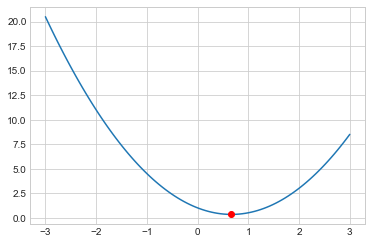

In [4]:
plt.plot(betas, func(betas))
plt.plot(y/(1+lambda_), func(y/(1+lambda_)), "or")

## (b)

In [5]:
y = 1
lambda_ = 1
betas = np.linspace(-3,3,100)
def func(beta):
    return (y - beta)**2 + lambda_ * abs(beta)

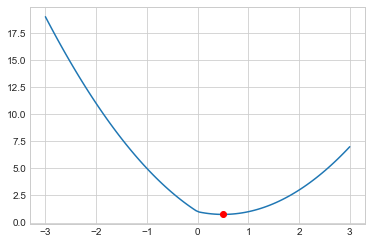

In [6]:
plt.plot(betas, func(betas))
plt.plot(y - lambda_/2, func(y - lambda_/2), "or")

# 8
## (a)

In [7]:
np.random.seed(1)
X = np.random.randn(100).reshape(-1,1)
e = np.random.randn(100).reshape(-1,1)

## (b)

In [8]:
y = 3 + 2*X -3*np.power(X,2) + 0.3*np.power(X,3) + e

## (c)

In [9]:
X_poly = pd.DataFrame(PolynomialFeatures(10).fit_transform(X))

In [9]:
def process_subset(features):
    # BIC, adj_r2
    regr = sm.OLS(y, X_poly[list(features)]).fit()
    bic = regr.bic
    adj_r2 = regr.rsquared_adj
    RSS = ((regr.predict(X_poly[list(features)]).values.reshape(-1,1) - y) ** 2).sum()
    
    return {"BIC": bic, "Adj_r2": adj_r2, "RSS": RSS, "Model": regr}

def get_best(k):
    results = []
    for combo in itertools.combinations(range(1,11), k):
        results.append(process_subset([0]+list(combo)))
        
    results = pd.DataFrame(results)
    max_adj_r2 = results.loc[results['Adj_r2'].idxmax()]
    min_bic = results.loc[results['BIC'].idxmin()]
    
    return [max_adj_r2, min_bic]

In [10]:
# This will take some time.
adj_r2 = []
bic = []
for i in range(1, 11):
    best = get_best(i)
    adj_r2.append(best[0])
    bic.append(best[1])

In [11]:
adj_r2 = pd.DataFrame(adj_r2, index=range(1,11))
bic = pd.DataFrame(bic, index=range(1,11))

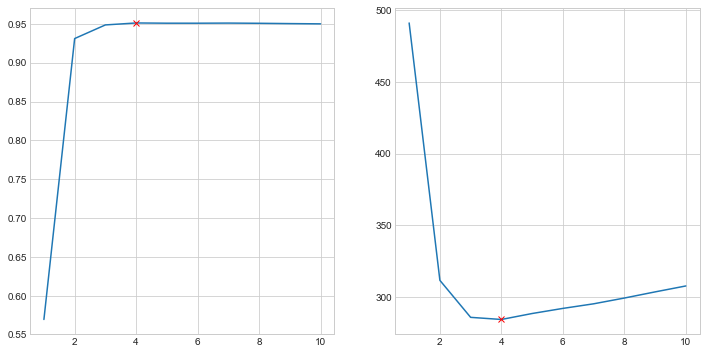

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
ax1, ax2 = axes

# Left Plot
ax1.plot(adj_r2['Adj_r2'])
argmax = adj_r2['Adj_r2'].idxmax()
ax1.plot(argmax, adj_r2['Adj_r2'].max(), "xr")

# Right Plot
ax2.plot(bic['BIC'])
argmin = bic['BIC'].idxmin()
ax2.plot(argmin, bic['BIC'].min(), "xr")

As you can see below, the best model obtained accroding to BIC, and adjusted $R^{2}$ are same.

In [13]:
adj_r2

,Adj_r2,BIC,Model,RSS
1,0.569598,491.292712,<statsmodels.regression.linear_model.Regressio...,726.411627
2,0.931164,311.572199,<statsmodels.regression.linear_model.Regressio...,114.991706
3,0.948702,285.734557,<statsmodels.regression.linear_model.Regressio...,84.811563
4,0.951225,284.249198,<statsmodels.regression.linear_model.Regressio...,79.800246
5,0.950924,288.410385,<statsmodels.regression.linear_model.Regressio...,79.446732
6,0.950908,291.978363,<statsmodels.regression.linear_model.Regressio...,78.626975
7,0.951064,295.185248,<statsmodels.regression.linear_model.Regressio...,77.535196
8,0.950810,299.215482,<statsmodels.regression.linear_model.Regressio...,77.090698
9,0.950418,303.509673,<statsmodels.regression.linear_model.Regressio...,76.851334
10,0.950091,307.654182,<statsmodels.regression.linear_model.Regressio...,76.498124


In [14]:
adj_r2['Model'][argmax].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     483.7
Date:                Mon, 22 Jan 2018   Prob (F-statistic):           3.19e-62
Time:                        20:53:28   Log-Likelihood:                -130.61
No. Observations:                 100   AIC:                             271.2
Df Residuals:                      95   BIC:                             284.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2769      0.128     25.625      0.000       3.023       3.531
1              1.9101      0.183     10.463      0.000       1.548       2.272
2             -3.3425      0.172    -19.460      0.000      -3.684      -3.002
3              0.4054      0.064      6.321      0.000       0.278       0.533
6              0.0209      0.009      2.443      0.016       0.004       0.038
==============================================================================
Omnibus:                        1.527   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.076
Skew:                          -0.236   Prob(JB):                        0.584
Kurtosis:                       3.187   Cond. No.                         50.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
bic

,Adj_r2,BIC,Model,RSS
1,0.569598,491.292712,<statsmodels.regression.linear_model.Regressio...,726.411627
2,0.931164,311.572199,<statsmodels.regression.linear_model.Regressio...,114.991706
3,0.948702,285.734557,<statsmodels.regression.linear_model.Regressio...,84.811563
4,0.951225,284.249198,<statsmodels.regression.linear_model.Regressio...,79.800246
5,0.950924,288.410385,<statsmodels.regression.linear_model.Regressio...,79.446732
6,0.950908,291.978363,<statsmodels.regression.linear_model.Regressio...,78.626975
7,0.951064,295.185248,<statsmodels.regression.linear_model.Regressio...,77.535196
8,0.950810,299.215482,<statsmodels.regression.linear_model.Regressio...,77.090698
9,0.950418,303.509673,<statsmodels.regression.linear_model.Regressio...,76.851334
10,0.950091,307.654182,<statsmodels.regression.linear_model.Regressio...,76.498124


In [16]:
bic['Model'][argmin].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     483.7
Date:                Mon, 22 Jan 2018   Prob (F-statistic):           3.19e-62
Time:                        20:53:28   Log-Likelihood:                -130.61
No. Observations:                 100   AIC:                             271.2
Df Residuals:                      95   BIC:                             284.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2769      0.128     25.625      0.000       3.023       3.531
1              1.9101      0.183     10.463      0.000       1.548       2.272
2             -3.3425      0.172    -19.460      0.000      -3.684      -3.002
3              0.4054      0.064      6.321      0.000       0.278       0.533
6              0.0209      0.009      2.443      0.016       0.004       0.038
==============================================================================
Omnibus:                        1.527   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.076
Skew:                          -0.236   Prob(JB):                        0.584
Kurtosis:                       3.187   Cond. No.                         50.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (d)
## Forward

In [17]:
def forward(predictors):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_poly.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(process_subset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models["RSS"].idxmin()]
    
    print("Processed ",models.shape[0], "models on", len(predictors)+1,
          "predictors")
    
    return best_model

In [18]:
models = pd.DataFrame(columns=["BIC","Adj_r2","RSS", "Model"])
predictors = [1]

for i in range(1, len(X_poly.columns)):
    models.loc[i] = forward(predictors)
    predictors = models.loc[i]["Model"].model.exog_names

Processed  10 models on 2 predictors
Processed  9 models on 3 predictors
Processed  8 models on 4 predictors
Processed  7 models on 5 predictors
Processed  6 models on 6 predictors
Processed  5 models on 7 predictors
Processed  4 models on 8 predictors
Processed  3 models on 9 predictors
Processed  2 models on 10 predictors
Processed  1 models on 11 predictors


In [19]:
models

,BIC,Adj_r2,RSS,Model
1,475.166812,0.648758,618.228318,<statsmodels.regression.linear_model.Regressio...
2,397.714909,0.837098,272.131961,<statsmodels.regression.linear_model.Regressio...
3,314.213358,0.931800,112.755289,<statsmodels.regression.linear_model.Regressio...
4,284.276388,0.951212,79.821947,<statsmodels.regression.linear_model.Regressio...
5,288.806036,0.950730,79.761687,<statsmodels.regression.linear_model.Regressio...
6,292.450935,0.950676,78.999423,<statsmodels.regression.linear_model.Regressio...
7,296.051427,0.950638,78.209708,<statsmodels.regression.linear_model.Regressio...
8,300.636868,0.950106,78.194279,<statsmodels.regression.linear_model.Regressio...
9,305.128148,0.949609,78.105274,<statsmodels.regression.linear_model.Regressio...
10,307.654182,0.950091,76.498124,<statsmodels.regression.linear_model.Regressio...


## Backward

In [20]:
def backward(predictors):

    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(process_subset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models["RSS"].idxmin()]
    
    print("Processed ",models.shape[0], "models on", len(predictors)+1,
          "predictors")
    
    return best_model

In [21]:
models = pd.DataFrame(columns=["BIC","Adj_r2","RSS", "Model"])
predictors = X_poly.columns

while(len(predictors) > 1):
    models.loc[len(predictors)-1] = backward(predictors)
    predictors = models.loc[len(predictors)-1]["Model"].model.exog_names

Processed  11 models on 12 predictors
Processed  10 models on 11 predictors
Processed  9 models on 10 predictors
Processed  8 models on 9 predictors
Processed  7 models on 8 predictors
Processed  6 models on 7 predictors
Processed  5 models on 6 predictors
Processed  4 models on 5 predictors
Processed  3 models on 4 predictors
Processed  2 models on 3 predictors


In [22]:
models

,BIC,Adj_r2,RSS,Model
10,303.509673,0.950418,76.851334,<statsmodels.regression.linear_model.Regressio...
9,299.215482,0.950810,77.090698,<statsmodels.regression.linear_model.Regressio...
8,295.588252,0.950866,77.848297,<statsmodels.regression.linear_model.Regressio...
7,291.978363,0.950908,78.626975,<statsmodels.regression.linear_model.Regressio...
6,289.322464,0.950475,80.174663,<statsmodels.regression.linear_model.Regressio...
5,286.291806,0.950218,81.447013,<statsmodels.regression.linear_model.Regressio...
4,287.437632,0.947821,86.268337,<statsmodels.regression.linear_model.Regressio...
3,311.572199,0.931164,114.991706,<statsmodels.regression.linear_model.Regressio...
2,491.292712,0.569598,726.411627,<statsmodels.regression.linear_model.Regressio...
1,551.944175,0.215420,1395.046697,<statsmodels.regression.linear_model.Regressio...


## (e)

In [23]:
X_ = scale(X_poly.drop(0,axis=1))
y = y.ravel()

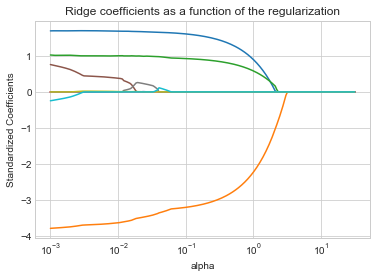

In [24]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(1.5, -3, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_, y)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Cross-Validation

In [25]:
n_alphas = 200
alphas = np.logspace(2, -3, n_alphas)

coefs = []
cv_errors = []
kf_10 = KFold(n_splits = 10)

for a in alphas:
    # CV Errors
    ridge = Ridge(alpha=a, fit_intercept=False)
    #kf_10 = KFold(n_splits = 10)
    score = -1*cross_val_score(ridge, X_, y, cv=kf_10,
                           scoring='neg_mean_squared_error').mean()
    cv_errors.append(score)
    
    # Coefficients
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_, y)
    coefs.append(ridge.coef_)

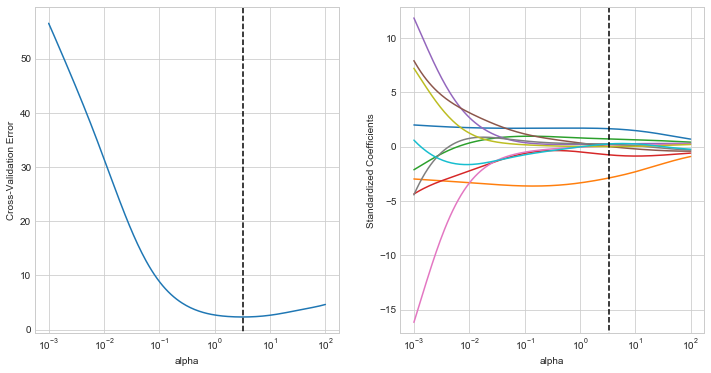

In [26]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
ax1, ax2 = axes

# Left Plot
ax1.plot(alphas, cv_errors)
ax1.plot([alphas[np.argmin(cv_errors)]]*2,[min(cv_errors)-10,max(cv_errors)+10],
         linestyle='--', c='k')
ax1.set_ylabel('Cross-Validation Error')
ax1.set_ylim([min(cv_errors)-3,max(cv_errors)+3])

# Right Plot
ax2.plot(alphas, coefs)
ax2.plot([alphas[np.argmin(cv_errors)]]*2,[np.max(ridge.coef_)+10,np.min(ridge.coef_)-10],
         linestyle='--', c='k')
ax2.set_ylabel('Standardized Coefficients')
ax2.set_ylim([np.min(ridge.coef_)-1,np.max(ridge.coef_)+1])

for i in range(len(axes)):
    axes[i].set_xscale('log')
    axes[i].set_xlabel('alpha')
    #axes[i].axis('tight')

## (f)
Do it yourself.

# 9

In [27]:
np.random.seed(1)
college = pd.read_csv('../Data/College.csv', index_col=0)

In [28]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [29]:
college['Private'] = np.where(college['Private']=="Yes",1,0)

In [30]:
y = college['Apps']
X = college.drop('Apps', axis=1)

## (a)

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

## (b)

In [32]:
regr = LinearRegression()
regr.fit(scale(X_train),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
MSE = mean_squared_error(regr.predict(scale(X_test)), y_test)
print(MSE)

649900.8200068838


## (c) Ridge

In [34]:
n_alphas = 200
alphas = np.logspace(3, -2, n_alphas)

ridgecv = RidgeCV(alphas=alphas, cv=10)
ridgecv.fit(scale(X_train), y_train)
ridgecv.alpha_

8.703591361485158

In [35]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge.predict(scale(X_test)))

9150082.829559203

In [36]:
pd.Series(ridge.coef_, index=X.columns)

Private        -162.869217
Accept         3454.019577
Enroll         -239.287226
Top10perc       751.649604
Top25perc      -194.458564
F.Undergrad     152.762294
P.Undergrad      11.713474
Outstate       -340.277893
Room.Board      208.741868
Books            -2.057379
Personal          5.419315
PhD            -125.193830
Terminal        -33.786114
S.F.Ratio        74.620726
perc.alumni     -27.017684
Expend          439.821715
Grad.Rate       161.993854
dtype: float64

## (d) Lasso

### Method 1

In [37]:
n_alphas = 200
alphas = np.logspace(3, -2, n_alphas)

lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train)
lassocv.alpha_

12.315506032928255

In [38]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scale(X_test)))

9146406.497638468

In [39]:
pd.Series(lasso.coef_, index=X.columns)

Private        -143.467373
Accept         3626.731320
Enroll         -225.783240
Top10perc       712.017862
Top25perc      -150.646597
F.Undergrad       0.000000
P.Undergrad       5.954624
Outstate       -339.471376
Room.Board      174.936181
Books             0.000000
Personal          0.000000
PhD            -113.472866
Terminal        -22.424065
S.F.Ratio        51.147591
perc.alumni      -9.921455
Expend          414.933710
Grad.Rate       118.028743
dtype: float64

## (e)

In [40]:
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100)

array([ 31.34,  57.19,  64.32,  69.99,  75.56,  80.55,  84.21,  87.46,
        90.43,  92.82,  94.92,  96.75,  97.79,  98.71,  99.37,  99.84,
       100.  ])

In [41]:
coefs = []
cv_errors = []
regr = LinearRegression()
kf_10 = KFold(n_splits=10, shuffle=True)
for i in range(1,18):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train, cv=kf_10,
                           scoring='neg_mean_squared_error').mean()
    cv_errors.append(score)

In [42]:
cv_errors = pd.DataFrame(cv_errors)
cv_errors.index = range(1,18)
M = cv_errors[0].idxmin()

In [43]:
X_reduced_test = pca.fit_transform(scale(X_test))[:,:M]
regr = LinearRegression()
regr.fit(X_reduced_train[:,:M], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

2708923.756055022

## (f)

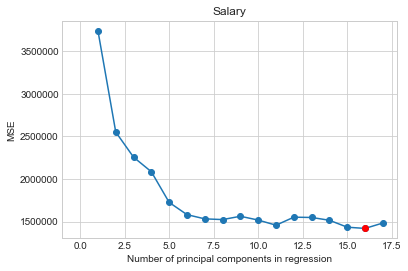

In [45]:
# 10-fold CV
kf_10 = KFold(n_splits=10, shuffle=True)
mse = []

for i in np.arange(1, 18):
    pls = PLSRegression(n_components=i)
    score = -1*cross_val_score(pls, scale(X_train), y_train, cv=kf_10,
                           scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
mse = pd.DataFrame(mse)
mse.index = range(1,18)

plt.plot(np.arange(1, 18), np.array(mse), '-o')
plt.plot(mse[0].idxmin(),mse[0].min(),"ro")
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [46]:
M = mse[0].idxmin()

In [47]:
pls = PLSRegression(n_components=M)
pls.fit(scale(X_train),y_train)
mean_squared_error(pls.predict(scale(X_test)),y_test)

649894.6478315684

## (g)
I'm not sure i've done these accurately....

# 10
## (a)

In [48]:
np.random.seed(5)
X = np.random.randn(1000,15)
beta = np.random.choice(np.arange(-3,3),15,replace=True)
epsilon = np.random.randn(1000)*2
y = np.dot(X,beta) + epsilon

## (b)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [50]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## (c)

In [52]:
def process_subset(features):
    regr = LinearRegression(fit_intercept=False)
    regr.fit(X_train[list(features)], y_train)
    MSE_train = mean_squared_error(regr.predict(X_train[list(features)]),
                             y_train)
    MSE_test = mean_squared_error(regr.predict(X_test[list(features)]),
                                y_test)
    
    return {"model": regr, "MSE_train": MSE_train, "MSE_test": MSE_test,
           "features": features}


def get_best(k):
    results = []
    for combo in itertools.combinations(X_train.columns, k):
        results.append(process_subset(combo))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['MSE_train'].idxmin()]
    
    return best_model

In [53]:
models = pd.DataFrame(columns=["MSE_train", "MSE_test", "model", "features"])

for i in range(1, 16):
    models.loc[i] = get_best(i)

In [54]:
models

,MSE_train,MSE_test,model,features
1,29.814266,30.250053,"LinearRegression(copy_X=True, fit_intercept=Fa...","(1,)"
2,25.334181,22.704728,"LinearRegression(copy_X=True, fit_intercept=Fa...","(1, 3)"
3,21.486534,19.444334,"LinearRegression(copy_X=True, fit_intercept=Fa...","(1, 3, 12)"
4,17.239034,16.272487,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 12)"
5,14.383812,11.986615,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 12, 14)"
6,11.524801,11.521164,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 11, 12, 14)"
7,9.405611,10.667719,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 7, 11, 12, 14)"
8,7.773684,9.861876,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 7, 9, 11, 12, 14)"
9,6.655127,8.787867,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 2, 3, 7, 9, 11, 12, 14)"
10,5.465757,7.769397,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 2, 3, 5, 7, 9, 11, 12, 14)"


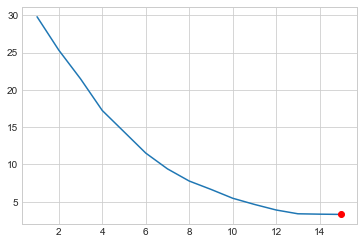

In [55]:
plt.plot(models['MSE_train'])
plt.plot(models['MSE_train'].idxmin(),models['MSE_train'].min(), "or")

## (d)

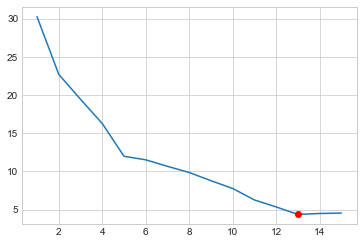

In [56]:
plt.plot(models['MSE_test'])
plt.plot(models['MSE_test'].idxmin(),models['MSE_test'].min(), "or")

## (e)
model with 13 predictors.

## (f)

In [81]:
# Construct coefficients 'coefs'. coefficients not used in the model
# are set to zero.
coefs = np.zeros(15)
for i, beta_num in enumerate(models.loc[13, 'features']):
    coefs[beta_num] = models.loc[13,'model'].coef_[i]
    
result = pd.DataFrame({'model':coefs, 'true':beta})
result

,model,true
0,-1.793899,-2
1,2.083488,2
2,-1.204322,-1
3,-2.678047,-3
4,0.967892,1
5,-1.042989,-1
6,0.000000,0
7,1.140474,1
8,0.000000,0
9,1.059123,1


## (g)

In [87]:
norms = []
for model_num in range(1,16):
    coefs = np.zeros(15)
    for i, beta_num in enumerate(models.loc[model_num, 'features']):
        coefs[beta_num] = models.loc[model_num,'model'].coef_[i]
        
    norm = np.sqrt(((coefs - beta)**2).sum())
    norms.append(norm)

norms = pd.DataFrame({'norm':norms}, index=np.arange(1,16))

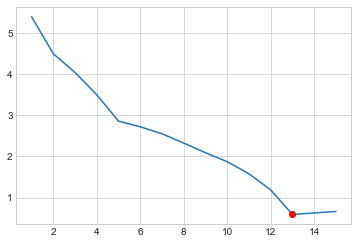

In [90]:
plt.plot(norms['norm'])
plt.plot(norms['norm'].idxmin(), norms['norm'].min(), "or")

Minimizing $\sqrt{\sum_{j=1}^{p} (\beta_{j}-\beta_{j}^{r})^{2}}$ gives the same result obtained by minimizing the test MSE.

# 11
Do it yourself.